In [4]:
from pathlib import Path
from asim.dataset.scene.arrow_scene import ArrowScene

<Axes: title={'center': 'Map: carla_town04'}>

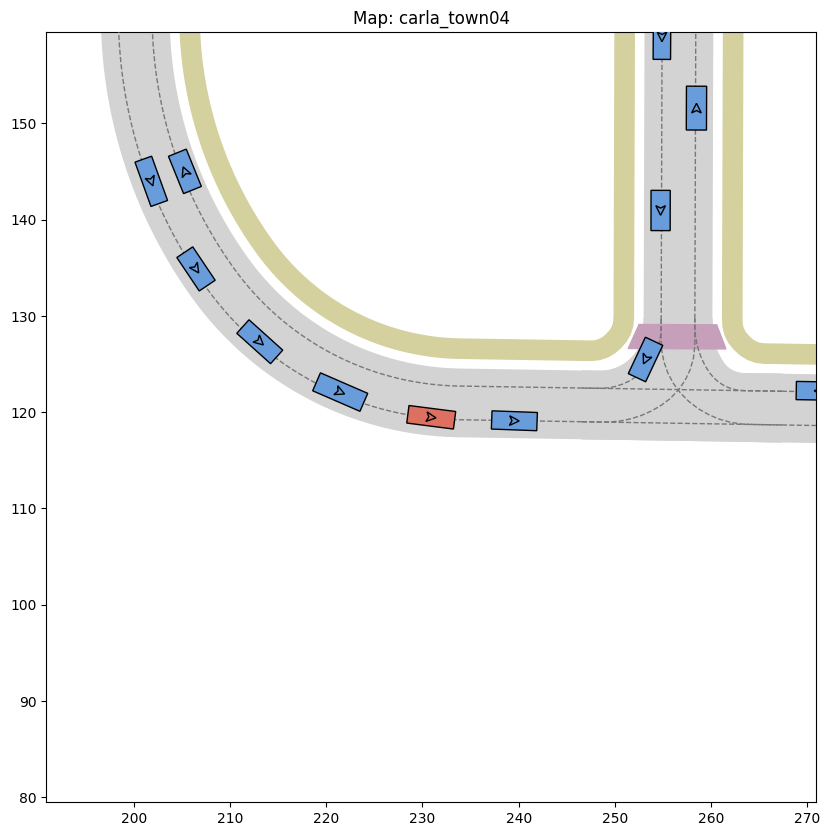

In [52]:
from typing import Optional, Tuple, Union

import matplotlib.pyplot as plt

import numpy as np

from asim.common.geometry.base import Point2D
from asim.common.geometry.bounding_box.bounding_box import BoundingBoxSE2, BoundingBoxSE3
from asim.common.geometry.tranform_2d import translate_along_yaw
from asim.common.visualization.color.color import ELLIS_5
from asim.dataset.scene.abstract_scene import AbstractScene

from asim.common.visualization.matplotlib.map import add_default_map_on_ax
from asim.common.visualization.matplotlib.observation import add_box_detections_to_ax, add_ego_vehicle_to_ax, add_traffic_lights_to_ax



def plot_scene_at_iteration(scene: AbstractScene, iteration: int = 0, ax: Optional[plt.Axes] = None):

    radius = 50

    ego_vehicle_state = scene.get_ego_vehicle_state_at_iteration(iteration)
    box_detections = scene.get_box_detections_at_iteration(iteration)
    traffic_light_detections = scene.get_traffic_light_detections_at_iteration(iteration)
    map_api = scene.map_api

    point_2d = ego_vehicle_state.bounding_box.center.state_se2.point_2d

    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))
    add_default_map_on_ax(ax, map_api, point_2d, radius=radius)
    # add_traffic_lights_to_ax(ax, traffic_light_detections, map_api)

    add_box_detections_to_ax(ax, box_detections)
    add_ego_vehicle_to_ax(ax, ego_vehicle_state)

    buffer_radius = 0.8 * radius
    ax.set_xlim(point_2d.x - buffer_radius, point_2d.x + buffer_radius)
    ax.set_ylim(point_2d.y - buffer_radius, point_2d.y + buffer_radius)

    ax.set_aspect("equal", adjustable="box")

    return ax


iteration = 3500
log_name = "_Rep0_longest1_route0_06_09_11_02_22"
log_file = Path(f"/home/daniel/asim_workspace/data/carla/{log_name}.arrow")
scene = ArrowScene(log_file)

plot_scene_at_iteration(scene, iteration=iteration)

red
(4, 2)
green
(4, 2)
red
(3, 2)
red
(1, 2)
green
(1, 2)
red
(1, 2)
red
(1, 2)
red
(1, 2)
red
(1, 2)
green
(1, 2)
red
(1, 2)
green
(1, 2)
red
(1, 2)
green
(1, 2)
red
(1, 2)
red
(1, 2)
green
(1, 2)
red
(1, 2)
red
(1, 2)
green
(1, 2)
red
(1, 2)
red
(1, 2)
red
(1, 2)
green
(1, 2)
red
(1, 2)
red
(1, 2)
green
(1, 2)
red
(1, 2)
red
(1, 2)
red
(1, 2)
green
(1, 2)
yellow
(1, 2)
red
(1, 2)
red
(1, 2)
red
(1, 2)
red
(1, 2)
red
(1, 2)
green
(1, 2)
red
(2, 2)
red
(1, 2)
green
(1, 2)
red
(1, 2)
red
(1, 2)


[]

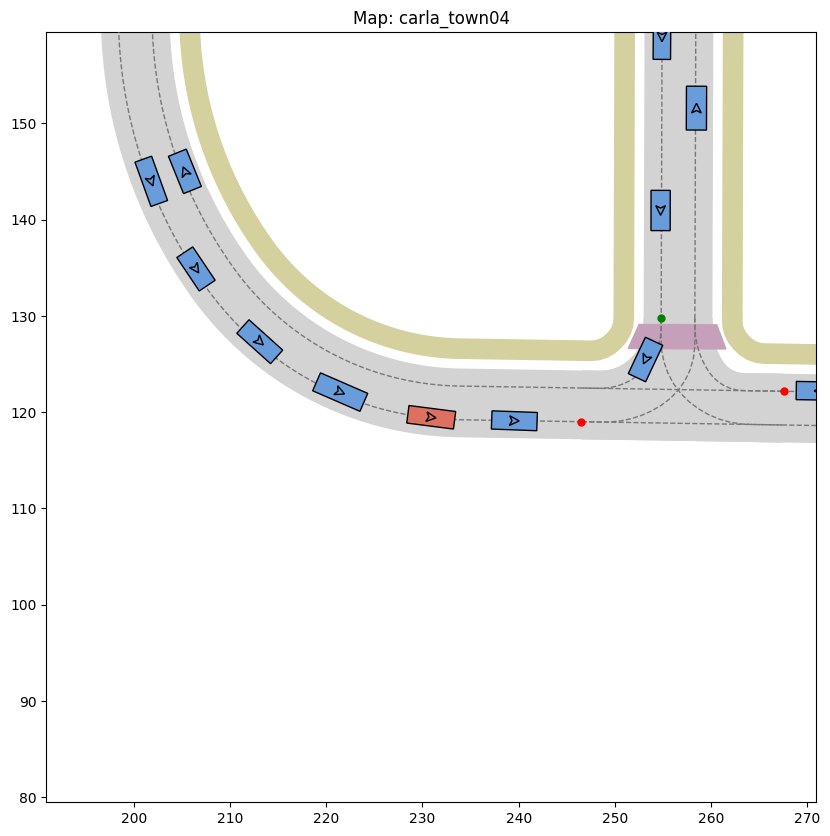

In [53]:
import gzip
import json
from typing import Dict


def _load_json_gz(path: Path) -> Dict:
    """Helper function to load a gzipped JSON file."""
    with gzip.open(path, "rt") as f:
        data = json.load(f)
    return data


log_path = Path(f"/home/daniel/carla_workspace/data/{log_name}")
bounding_box_paths = sorted([bb_path for bb_path in (log_path / "boxes").iterdir()])

box_dict  = _load_json_gz(bounding_box_paths[iteration])

box_dict["traffic_light_raw"]


ax = plot_scene_at_iteration(scene, iteration=iteration)

for state, waypoints in box_dict["traffic_light_raw"]:


    print(state)
    arr = np.array(waypoints)
    print(arr.shape)
    ax.plot(arr[:,0], arr[:,1], marker="o", color=state, markersize=5, zorder=10)
ax.plot()

In [26]:
bounding_box_paths



[PosixPath('/home/daniel/carla_workspace/data/_Rep0_debug_route0_06_09_10_41_32/boxes/0000000002.json.gz'),
 PosixPath('/home/daniel/carla_workspace/data/_Rep0_debug_route0_06_09_10_41_32/boxes/0000000004.json.gz'),
 PosixPath('/home/daniel/carla_workspace/data/_Rep0_debug_route0_06_09_10_41_32/boxes/0000000006.json.gz'),
 PosixPath('/home/daniel/carla_workspace/data/_Rep0_debug_route0_06_09_10_41_32/boxes/0000000008.json.gz'),
 PosixPath('/home/daniel/carla_workspace/data/_Rep0_debug_route0_06_09_10_41_32/boxes/0000000010.json.gz'),
 PosixPath('/home/daniel/carla_workspace/data/_Rep0_debug_route0_06_09_10_41_32/boxes/0000000012.json.gz'),
 PosixPath('/home/daniel/carla_workspace/data/_Rep0_debug_route0_06_09_10_41_32/boxes/0000000014.json.gz'),
 PosixPath('/home/daniel/carla_workspace/data/_Rep0_debug_route0_06_09_10_41_32/boxes/0000000016.json.gz'),
 PosixPath('/home/daniel/carla_workspace/data/_Rep0_debug_route0_06_09_10_41_32/boxes/0000000018.json.gz'),
 PosixPath('/home/daniel/car